# Clasificación de Imágenes Rostro

En este Jupyter Notebook, vamos a desarrollar un clasificador de imágenes utilizando la arquitectura de red neuronal convolucional (CNN) conocida como VGG-16. Este modelo ha demostrado ser muy efectivo en tareas de clasificación de imágenes.

El objetivo es distinguir entre mi rostro y uno que no sea el mío. Para ello, utilizaremos un conjunto de datos de 200 fotografías capturadas en ráfaga.

VGG-16 es una arquitectura de CNN propuesta por K. Simonyan y A. Zisserman de la Universidad de Oxford en el paper "Very Deep Convolutional Networks for Large-Scale Image Recognition". Esta red es caracterizada por su simplicidad, utilizando solo capas convolucionales 3x3 apiladas una sobre otra en profundidad creciente.

Vamos a entrenar nuestro modelo en este conjunto de datos y evaluar su rendimiento. A lo largo de este notebook, exploraremos diferentes aspectos del proceso de entrenamiento y optimización del modelo, así como también la evaluación de su rendimiento.

Primero, vamos a importar las bibliotecas necesarias:

In [1]:
! pip install ipykernel
! pip install opencv-python
! pip install keras
! pip install scikit-learn
! pip install tensorflow
! pip install matplotlib

In [2]:
import os
import cv2


In [3]:
import numpy as np
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

Cargamos las imágenes de perros y gatos:

In [4]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (224, 224))  # Cambiamos la dimensión para que coincida con la dimensión de entrada de VGG-16
            images.append(img)
            'yo' in folder
            labels.append(1)

    return images, labels

yo_images, yo_labels = load_images('C:/Users/CarlosPadilla(GER-RE/OneDrive - Recover/Maestria_IA/Modulo_Percepcion_computacional/Proyecto_uno/data/yo')

# Combinamos los arrays de perros y gatos
images = np.array(yo_images)
labels = np.array(yo_labels)

# One-hot encoding de las etiquetas
labels = to_categorical(labels)

Dividmos los datos en conjuntos de entrenamiento y prueba:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

Construimos y entrenamos la red neuronal convolucional VGG-16:

In [6]:
# Cargamos la red VGG16, asegurándonos de que se dejan fuera las capas superiores de la red preentrenada (head FC layer)
baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))



In [7]:
# Construimos la capa que se colocará en la parte superior del modelo base (baseModel)
model = Sequential()
model.add(baseModel)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Dos clases (perro y gato), por lo que la capa de salida tiene 2 neuronas



In [8]:
# Congelamos las capas del modelo base para que no se actualicen durante el entrenamiento
for layer in baseModel.layers:
    layer.trainable = False



In [9]:
# Compilamos el modelo 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



In [10]:
# Entrenamos el modelo
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)

# model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 58s 13s/step - accuracy: 0.5861 - loss: 2.2897 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 182s 45s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 116s 11s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 33s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 32s 7s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 1.0000 - loss: 

In [11]:
# Evaluamos el modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 858ms/step - accuracy: 1.0000 - loss: 0.0000e+00
Loss: 0.0
Accuracy: 1.0


In [12]:
# Hacemos una predicción con una nueva imagen para comprobar que el modelo funciona
img = cv2.imread('yo.jpg')
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step
[[0. 1.]]


Otro


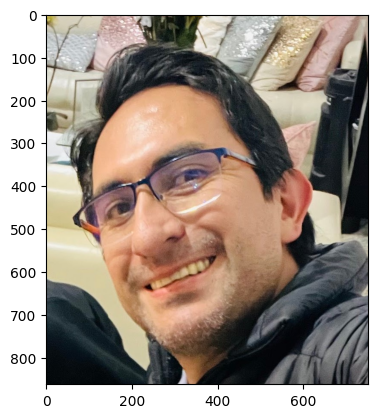

In [13]:
# Mostramos la etiqueta de la predicción
if pred[0][0] > pred[0][1]:
    print('Yo')
else:
    print('Otro')

# Mostramos la imagen con la etiqueta en el notebook
import matplotlib.pyplot as plt
img = cv2.imread('yo.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
